# Diabet kasalligini aniqlash

Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

Ustunlar

*   Pregnancies: homilador bo'lish soni
*   Glucose: glyukozaga test natijasi
*   BloodPressure: diastolik qon bosimi (mm Hg)
*   SkinThickness: Triceps teri burmasining qalinligi (mm)
*   Insulin: 2 soatlik sarum insulini (mu U/ml)
*   BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
*   DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
*   Age: Yosh (yil)
*   Outcome: Class (0 - diabet yo'q, 1 - diabet)



In [121]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [123]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [124]:
df.shape

(768, 9)

In [125]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [126]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [127]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Model yaratish

In [128]:
X = df.drop('Outcome',axis =1).values
y= df['Outcome']

In [129]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
X = scaler.fit_transform(X)

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.10, random_state=12)

k-NN algoritmi

In [131]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [132]:
y_predict = knn.predict(X_test)

# Modelni baholash
jaccard index

In [133]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test,y_predict)

0.5454545454545454

confusion matrix

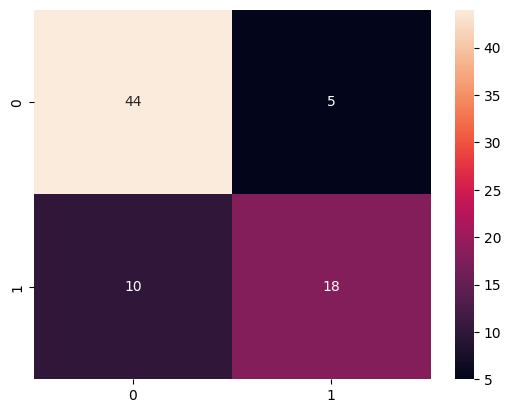

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

# Eng yaxshi K ni aniqlaymiz

In [135]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [136]:
#eng yaxshi K
knn_gscv.best_params_

{'n_neighbors': 17}

In [137]:
y_pre = knn_gscv.predict(X_test)

# Qayta baholaymiz

In [138]:
#jaccard index
from sklearn.metrics import jaccard_score

jaccard_score(y_test,y_pre)

0.696969696969697

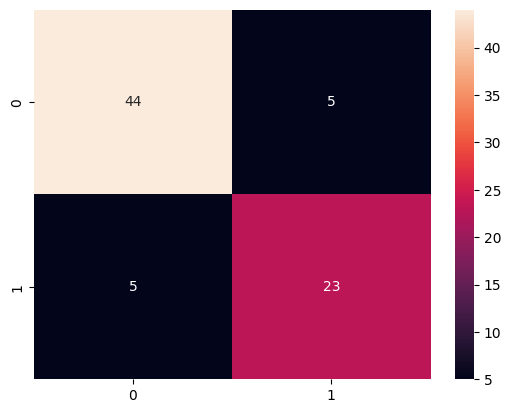

In [139]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pre), annot=True)
plt.show()